In [1]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing, model_selection, metrics
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score 


import warnings
warnings.filterwarnings("ignore")

**Prétraitement des Données**

In [2]:
df= pd.read_csv("/kaggle/input/basic-datasets/stroke.csv")


In [3]:
df.head(9)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
df.drop(columns='id').describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [6]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [7]:
df['smoking_status'].value_counts(dropna=False)

smoking_status
never smoked       16053
NaN                13292
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [8]:
df['hypertension'].value_counts()

hypertension
0    39339
1     4061
Name: count, dtype: int64

In [9]:
#Distribution de la variable cible (stroke)
df['stroke'].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

In [10]:
df['heart_disease'].value_counts() 

heart_disease
0    41338
1     2062
Name: count, dtype: int64

In [11]:
df['ever_married'].value_counts() 

ever_married
Yes    27938
No     15462
Name: count, dtype: int64

In [12]:
df['Residence_type'].value_counts() 

Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64

In [13]:
df['gender'].value_counts() 

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

In [14]:
df['smoking_status']= df['smoking_status'].fillna('Unknown')

In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['bmi']] = imputer.fit_transform(df[['bmi']])
df['bmi'].isnull().sum()

0

**Analyse Exploratoire des Données (EDA)**

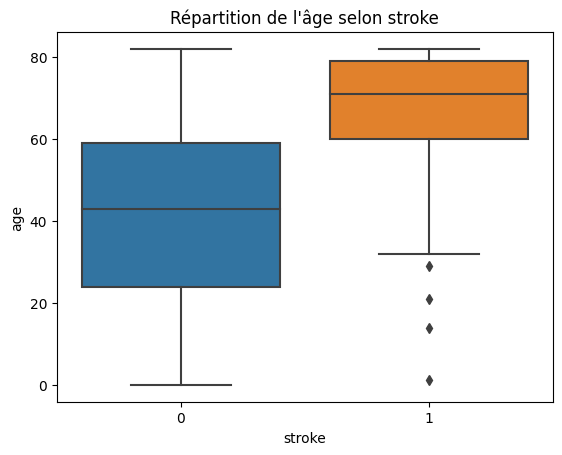

In [16]:
sns.boxplot(data=df, x='stroke', y='age')
plt.title('Répartition de l\'âge selon stroke')
plt.show()


Text(0.5, 1.0, 'Niveau de glucose moyen selon stroke')

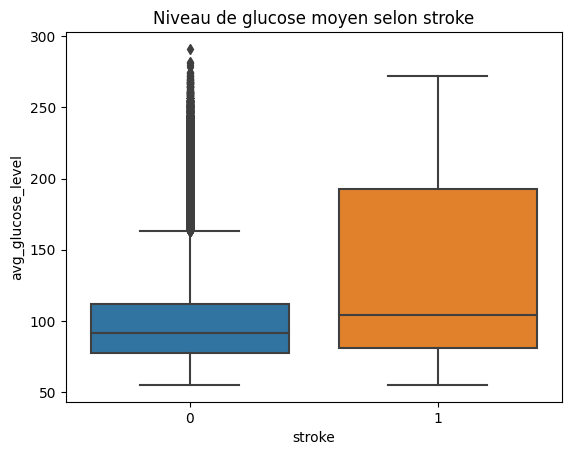

In [17]:
sns.boxplot(data=df, x='stroke', y='avg_glucose_level')
plt.title('Niveau de glucose moyen selon stroke')

Text(0.5, 1.0, 'IMC (bmi) selon stroke')

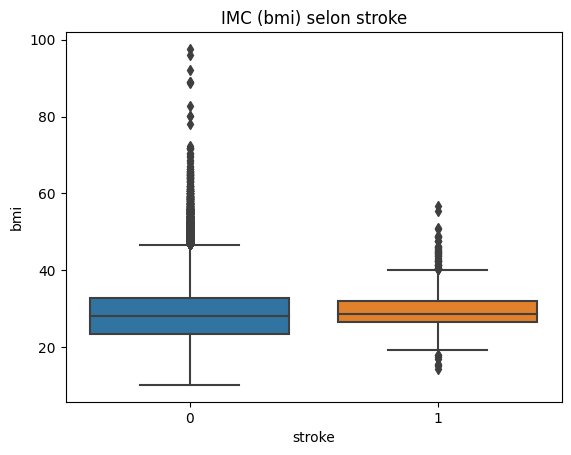

In [18]:
sns.boxplot(data=df,x='stroke',y='bmi')
plt.title('IMC (bmi) selon stroke')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'never smoked'),
  Text(2, 0, 'formerly smoked'),
  Text(3, 0, 'smokes')])

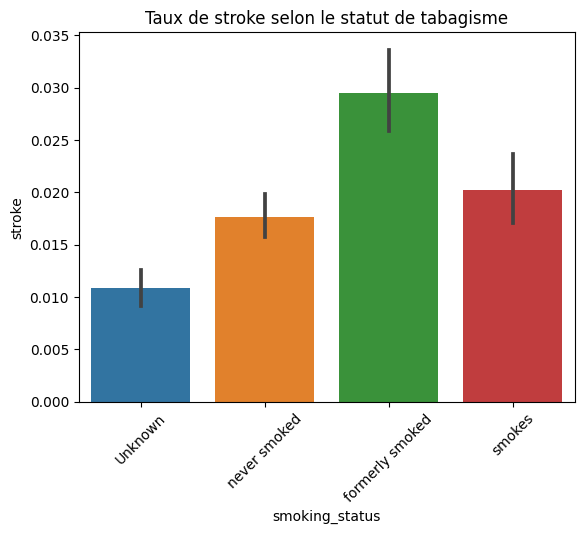

In [19]:
sns.barplot(data=df, x='smoking_status', y='stroke')
plt.title('Taux de stroke selon le statut de tabagisme')
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Taux de stroke selon le type de residance ')

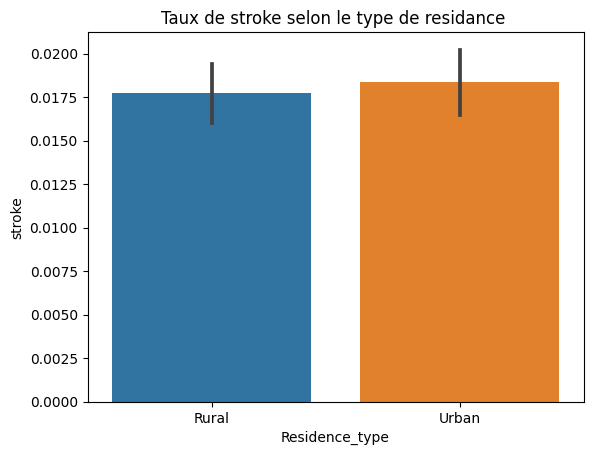

In [20]:
sns.barplot(data=df,x='Residence_type',y='stroke' )
plt.title('Taux de stroke selon le type de residance ' )

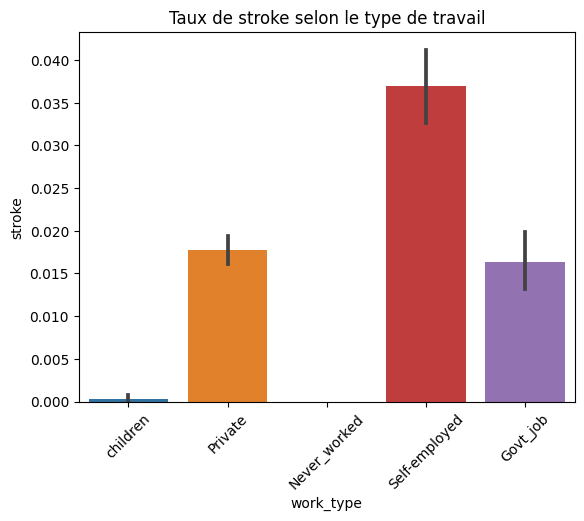

In [21]:
sns.barplot(data=df, x='work_type', y='stroke')
plt.title('Taux de stroke selon le type de travail')
plt.xticks(rotation=45)
plt.show()

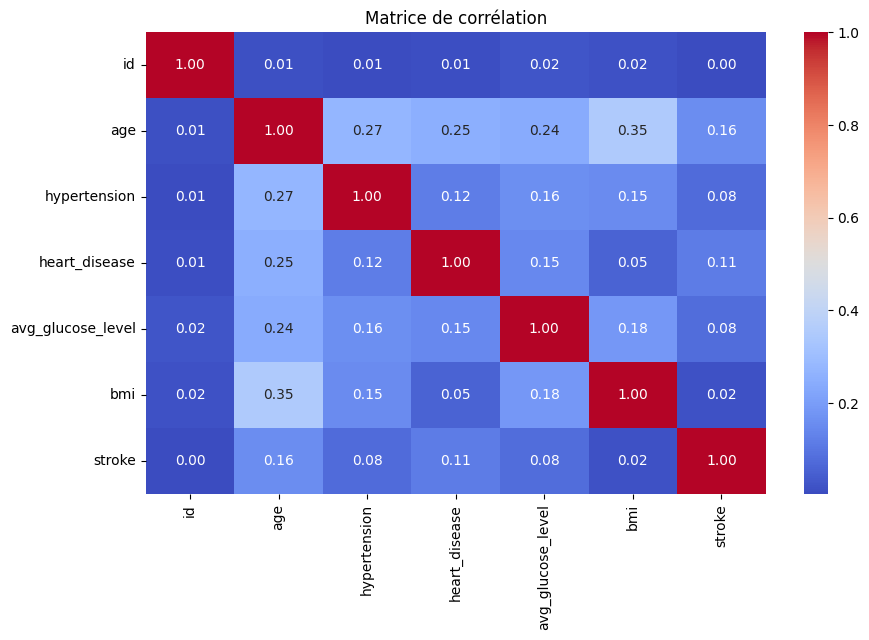

In [22]:
numeric_cols = df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


In [23]:
# One-Hot Encoding
cat_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Appliquer One-Hot Encoding
df = pd.get_dummies(df, columns=cat_columns, drop_first=True)

**Split des données (train/test)**

**Cost-Sensitive Learning & LogisticRegression**

In [24]:
from sklearn.linear_model import LogisticRegression

features = [
    "age", "avg_glucose_level", "bmi",
    "ever_married_Yes", "heart_disease", "hypertension",
    "work_type_Self-employed", "Residence_type_Urban",
    "gender_Male", "work_type_children",
    "smoking_status_never smoked", "gender_Other",
    "work_type_Private", "smoking_status_formerly smoked",
    "smoking_status_smokes", "work_type_Never_worked"
]

X = df[features]
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression with Class Weights 
model = LogisticRegression(class_weight="balanced", max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Predictions and Evaluation 
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Accuracy Score: 0.7345622119815668


NameError: name 'precision_score' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier


X= df[["age","avg_glucose_level","bmi","ever_married_Yes","heart_disease","hypertension","work_type_Self-employed","Residence_type_Urban",
      "gender_Male","work_type_children","smoking_status_never smoked","gender_Other",
       "work_type_Private","smoking_status_formerly smoked","smoking_status_smokes","work_type_Never_worked",]]
y=df["stroke"]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

model=DecisionTreeClassifier()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("accuracy score is ",accuracy_score(y_pred,y_test))
print("precision score is ",precision_score(y_pred,y_test))
print("recall score is ",recall_score(y_pred,y_test))
print("f1 score is ",f1_score(y_pred,y_test))

print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


**XGBOOST (eXtreme Gradient Boosting)**

In [ ]:
#Installer xgboost si nécessaire

#pip install --upgrade scikit-learn imbalanced-learn


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


X = df[["age","avg_glucose_level","bmi","ever_married_Yes","heart_disease","hypertension","work_type_Self-employed",
        "Residence_type_Urban","gender_Male","work_type_children","smoking_status_never smoked","gender_Other",
        "work_type_Private","smoking_status_formerly smoked","smoking_status_smokes","work_type_Never_worked"]]

y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gérer le déséquilibre des classes 
# Calcul du ratio pour ajuster le poids de la classe minoritaire

ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

# Créer le modèle XGBoost 
model = XGBClassifier(
    scale_pos_weight=ratio,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

# Prédictions 
y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.3  # 🔧 Tu peux ajuster ce seuil
y_pred = (y_proba >= threshold).astype(int)

# Évaluation 
print("accuracy score is ", accuracy_score(y_test, y_pred))
print("precision score is ", precision_score(y_test, y_pred))
print("recall score is ", recall_score(y_test, y_pred))
print("f1 score is ", f1_score(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
